In [1]:
%run excute_nonZS_MaxMin.ipynb
%matplotlib inline
import csv
import statsmodels.api as sm
import pandas as pd

C:\Users\xzhan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\xzhan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [17]:
# x_values Normalizaion 

nxG = nx.from_numpy_matrix(G) 
# G = nx.karate_club_graph()
print("_______________Degree Centrality_____________________________")  
deg_centrality = nx.degree_centrality(nxG)
sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
converted_dict = dict(sortedDict)
print(converted_dict)
#print("                           ")
print("_______________Closeness Rank_____________________________")
close_centrality = nx.closeness_centrality(nxG)
sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
converted_dict1 = dict(sortedDict1)
print(converted_dict1)
#print("                           ")
print("_______________Page Rank_____________________________")
pr = nx.eigenvector_centrality(nxG)
sortedDict2 = sorted(pr.items(), key=lambda x:x[1])
converted_dict2 = dict(sortedDict2)
print(converted_dict2)

#print("                           ")

def gap(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return abs(x)

gap = gap(s,n)
my_gap = {index: value for index, value in enumerate(gap)}
sorting_gap = sorted(my_gap.items(), key=lambda x:x[1], reverse=True)
sorted_gap = dict(sorting_gap)
print("opinion - mean")
print(sorted_gap)

_______________Degree Centrality_____________________________
{29: 0.034482758620689655, 28: 0.20689655172413793, 26: 0.27586206896551724, 20: 0.3448275862068966, 22: 0.3793103448275862, 8: 0.4482758620689655, 16: 0.4482758620689655, 27: 0.4482758620689655, 1: 0.48275862068965514, 25: 0.48275862068965514, 3: 0.5172413793103449, 4: 0.5172413793103449, 23: 0.5172413793103449, 0: 0.5517241379310345, 11: 0.5517241379310345, 14: 0.5517241379310345, 18: 0.5517241379310345, 24: 0.5517241379310345, 2: 0.5862068965517241, 12: 0.5862068965517241, 15: 0.5862068965517241, 17: 0.5862068965517241, 7: 0.6206896551724138, 21: 0.6206896551724138, 5: 0.6551724137931034, 13: 0.6551724137931034, 19: 0.6551724137931034, 6: 0.6896551724137931, 10: 0.7241379310344828, 9: 0.7586206896551724}
_______________Closeness Rank_____________________________
{29: 0.453125, 28: 0.5576923076923077, 26: 0.5686274509803921, 20: 0.5918367346938775, 22: 0.6041666666666666, 8: 0.6444444444444445, 16: 0.6444444444444445, 25: 

In [18]:
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
op = copy.copy(s)
op[v1] = max_opinion
all = list(range(n))    # for all agent 
C1 = [x for x in all if x != v1]  # for the vertice that Maximizer has not touched
innat_por = obj_polarization(A, s, n)
results = []
for v2 in C1:   
    (changed_opinion, por) = derivate_s(op,n,v2,A)   # find the best new_op option  
    por_1 = por - innat_por     # append the change of the polarization
    results.append((v2, por_1))
results.append((v1,0)) # minimizer cannot choose v1, but we need all nodes for the dataframe
actual_Y = dict(results)
# most of v are in sequential order, but v1 might not be in order, so we need to sort it
sorted_actual_Y = sorted(actual_Y.items(), key=lambda x:x[0])
actual_Y_dict = dict(sorted_actual_Y)  # dictionary -  node:polarization
print("actual_Y_dict",actual_Y_dict)

# create the rank of the Y values based on minimizer's choice 
actual_Y_order = dict(sorted(actual_Y.items(), key=lambda x:x[1]))
# print("actual_Y_order",actual_Y_order)
rank1_list = list(range(n))
node_ranks= dict(zip(actual_Y_order.keys(), rank1_list)) # dictionary -  node:polarization rank
actual_ranks = dict(sorted(node_ranks.items(), key=lambda x:x[0]))
print(actual_ranks)

actual_Y_dict {0: 0.06765100586316014, 1: 0.0665493299120839, 2: 0.06700027337805942, 3: 0.06807916954496893, 4: 0.07286783023500448, 5: 0.06966032099513922, 6: 0.07119648824047445, 7: 0.06925825152635168, 8: 0.07213591978094669, 9: 0.07206963079648177, 10: 0.06514393091854642, 11: 0.07118383592362537, 12: 0.06697491964629684, 13: 0.07228857035173242, 14: 0.07161733886401425, 15: 0.06602524622526523, 16: 0.07214046294248194, 17: 0.06554589596949295, 18: 0.07127742940413392, 19: 0.06454696619126127, 20: 0.0650342370763185, 21: 0.06251099664967324, 22: 0.06608109245813959, 23: 0.06809612432682713, 24: 0.07198128053342931, 25: 0.06579791867280577, 26: 0.07209838491519643, 27: 0.06991519045394706, 28: 0.07028545073512124, 29: 0}
{0: 12, 1: 9, 2: 11, 3: 13, 4: 29, 5: 16, 6: 20, 7: 15, 8: 26, 9: 24, 10: 4, 11: 19, 12: 10, 13: 28, 14: 22, 15: 7, 16: 27, 17: 5, 18: 21, 19: 2, 20: 3, 21: 1, 22: 8, 23: 14, 24: 23, 25: 6, 26: 25, 27: 17, 28: 18, 29: 0}


## Mathmatic Functions

In [19]:
# Call prediction function, and take most possible N nodes in the prediction
# Prediction results are ranked in a way that most possible N nodes = N nodes that generated least polarization(for min's good)
def N_Result(N,converted_dict,converted_dict1,converted_dict2):
    (max_pred,min_pred) = pred(N,converted_dict,converted_dict1,converted_dict2) 

    max_suc_count = 0
    min_suc_count = 0
    if v1 in max_pred:
        max_suc_count +=1
    if v2 in min_pred:
        min_suc_count +=1   
    
    return(max_suc_count,min_suc_count)

# Find the ground truth of Min's action - knowing Max chooses v1, what Min's action will be?
def actual_rank(s, n, v1, max_opinion):

    L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
    A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
    op = copy.copy(s)
    op[v1] = max_opinion
    all_1 = list(range(n))    # for all agent 
    C1 = [x for x in all_1 if x != v1]  # for the vertice that Maximizer has not touched
    innat_por = obj_polarization(A, s, n) # Calculate innate polarization
    results = []
    for v2 in C1:   
        (changed_opinion, por) = derivate_s(op,n,v2,A)   # find the best new_op option  
        por_1 = por - innat_por     # append the change of the polarization
        results.append((v2, por_1))
    results.append((v1,0)) # minimizer cannot choose v1, but we need all nodes for the dataframe
    actual_Y = dict(results) # now we have - node:polarization
    
    # most of v are in sequential order, but v1 might not be in order, so we need to sort it
    sorted_actual_Y = sorted(actual_Y.items(), key=lambda x:x[0])
    actual_Y_dict = dict(sorted_actual_Y)  # dictionary -  node:polarization
    print("actual_Y_dict",actual_Y_dict) 

    # create the rank of the Y values based on minimizer's choice 
    actual_Y_order = dict(sorted(actual_Y.items(), key=lambda x:x[1]))  #sort - list nodes in sequential of the polariz.

    node_ranks= dict(zip(actual_Y_order.keys(), all_1)) # dictionary -  node:polarization rank(replace polarz. with rank)
    actual_ranks = dict(sorted(node_ranks.items(), key=lambda x:x[0])) # sort - list node in sequential node index
    
    return (actual_Y_dict, actual_ranks)  # return two dictionary, 1. sequential node: polarization, 
                                                                # 2. seq. node: pol rank


# Prediction - Max prediction only based on eigen-value centrality
#              Min prediction use 3 factors - X1. Eigen-value centrality
                                             #X2. Extremity of the node's innate opinion
                                             #X3. Closest path from node i to v1(Max node)
# Use regression Polarization Change = beta_1 * X1 + beta_2 * X2 + beta_3 * X3 + beta_0
def pred(N,converted_dict,converted_dict1,converted_dict2,sorted_gap):
    # Using islice() + items()
    # Get first N items in dictionary
    a = list(itertools.islice(converted_dict.keys(), N)) #degree centrality
    b = list(itertools.islice(converted_dict1.keys(), N)) #closeness centrality
    c = list(itertools.islice(converted_dict2.keys(), N)) #eigen-value centrality
    
    max_pred = c
    
    df = pd.DataFrame({'keys': list(op_ranks.keys())})
    
    #max_pred = sorted(np.unique(a+b+c))
    df['x11'] = df['keys'].apply(lambda x: sorted_gap[x][0])
    df['x22'] = df['keys'].apply(lambda x: converted_dict2[x])
    df['x33'] = df['keys'].apply(lambda x: all_shortest_paths[x])
    df['y_value'] = df['keys'].apply(lambda x: actual_Y_dict[x])


    # add a constant term to the dataframe
    df = sm.add_constant(df)

    # fit the linear regression model
    model = sm.OLS(df['y_value'], df[['const', 'x11','x22','x33']]).fit()
    
    pred_Y = model.predict(df[['const', 'x1','x2','x3']])

    
    min_pred = list(itertools.islice(sorted_gap.keys(), N))
    
    return (max_pred, min_pred)


#def pred_3_metrics(N,converted_dict,converted_dict1,converted_dict2,sorted_gap):
# Using islice() + items()

# Get first N items in dictionary
# a = list(itertools.islice(converted_dict.keys(), N))
# b = list(itertools.islice(converted_dict1.keys(), N))
# c = list(itertools.islice(converted_dict2.keys(), N))

# max_pred = c

#     print("Max limited by K is : " + str(max_pred))



# #     #print("*********new ranks*************")      
# #     new_rank = {i: 0.5*op_ranks.get(i, 0) + 0.5*ecen_ranks.get(i, 0) for i in set(op_ranks).union(ecen_ranks)}
# #     #print(new_rank)
# #     sorting_rank = sorted(new_rank.items(), key=lambda x:x[1])
# #     sorted_rank = dict(sorting_rank)
# # #     print(sorted_rank)
# #     min_pred1= list(itertools.islice(sorted_rank.keys(), N))

# # #     first_key = next(iter(converted_dict2)) 
# # #     converted_dict2.pop(first_key)
# # #     min_pred2= list(itertools.islice(converted_dict2.keys(), N))

# #     min_pred = min_pred1 + min_pred2
# #     print(min_pred)

# # printing result
# #     print("Min limited by K is : " + str(min_pred))

# #     return (max_pred, min_pred)


In [20]:
# x_values Normalizaion 
from sklearn.preprocessing import MinMaxScaler
def rescale(dic): # input x is a dictionary - sorted node index: value
    minmax_scale = MinMaxScaler(feature_range=(0, 1))
    x = list(dic.values())
    x = np.array(x)
    x = x.reshape(-1, 1)
    x_scale = minmax_scale.fit_transform(x).flatten()
    dic_scale = dict(zip(dic.keys(),x_scale))
    return dic_scale  # output

In [25]:
################### create shortest path from all nodes to max selected node v1 ############
nxG = nx.from_numpy_matrix(G)  
paths = nx.single_source_shortest_path(nxG, v1)
# the length of shortest path from v2 to v1
lenths =[]
for v in paths.items():
    lenth = len(v[1])
    lenths.append(lenth)  
PathLen = dict(zip(paths.keys(),lenths))
print("path_lenth",PathLen)

# creat a dict node:shortest length to v1(max selected node)
scaled_MinPath = rescale(PathLen) # rescale the shortest path to the range (0,1) for regression
print("scaled path lenths",scaled_MinPath)
# sorting all varibles based on the node index
scaled_MinPaths_sort = dict(sorted(scaled_MinPath.items(), key=lambda x:x[0]))
print("scaled_paths_sort",scaled_MinPaths_sort)
sorted_gap = dict(sorted(sorted_gap.items(), key=lambda x:x[0]))
converted_dict2 = dict(sorted(converted_dict2.items(), key=lambda x:x[0]))

##################################the actual rank based on polarization ####################
(actual_Y_dict, actual_ranks) = actual_rank(s, n, v1, max_opinion)
 # rescale the polarization change to the range (0,1) for regression
rescaled_dict = rescale(actual_Y_dict)
print("rescaled Y",rescaled_dict)

path_lenth {29: 1, 9: 2, 0: 3, 1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 3, 7: 3, 8: 3, 10: 3, 11: 3, 12: 3, 13: 3, 14: 3, 16: 3, 17: 3, 19: 3, 23: 3, 24: 3, 27: 3, 28: 3, 15: 4, 20: 4, 21: 4, 26: 4, 22: 4, 25: 4, 18: 4}
scaled path lenths {29: 0.0, 9: 0.3333333333333333, 0: 0.6666666666666667, 1: 0.6666666666666667, 2: 0.6666666666666667, 3: 0.6666666666666667, 4: 0.6666666666666667, 5: 0.6666666666666667, 6: 0.6666666666666667, 7: 0.6666666666666667, 8: 0.6666666666666667, 10: 0.6666666666666667, 11: 0.6666666666666667, 12: 0.6666666666666667, 13: 0.6666666666666667, 14: 0.6666666666666667, 16: 0.6666666666666667, 17: 0.6666666666666667, 19: 0.6666666666666667, 23: 0.6666666666666667, 24: 0.6666666666666667, 27: 0.6666666666666667, 28: 0.6666666666666667, 15: 1.0, 20: 1.0, 21: 1.0, 26: 1.0, 22: 1.0, 25: 1.0, 18: 1.0}
scaled_paths_sort {0: 0.6666666666666667, 1: 0.6666666666666667, 2: 0.6666666666666667, 3: 0.6666666666666667, 4: 0.6666666666666667, 5: 0.6666666666666667, 6: 0.6666666666666667

In [26]:
# create a dataframe from the dictionaries
df = pd.DataFrame({'keys': list(converted_dict2.keys())})
#max_pred = sorted(np.unique(a+b+c))
df['x11'] = df['keys'].apply(lambda x: sorted_gap[x][0])
# # print(df['x11'])
# print('__')
df['x22'] = df['keys'].apply(lambda x: converted_dict2[x])
# print(df['x22'])
# print('__')
df['x33'] = df['keys'].apply(lambda x: shortest_paths_1[x])
print(df['x33'])
# print('__')
df['y_value'] = df['keys'].apply(lambda x: actual_Y_dict[x])
df['y1_value'] = df['keys'].apply(lambda x: rescaled_dict[x])


# add a constant term to the dataframe
df = sm.add_constant(df)

# fit the linear regression model
model = sm.OLS(df['y1_value'], df[['const', 'x11','x22','x33']]).fit()

# # add a constant term to the dataframe
#     df = sm.add_constant(df)
#     Y = df['y_rank']
#     X = df[['const', 'x11','x22','x33']]
#     X = sm.add_constant(X)
#     # fit the linear regression model
#     model = sm.OLS(Y,X).fit()

pred_Y = model.predict(df[['const', 'x11','x22','x33']])
print(pred_Y)
pred_index = np.argmin(pred_Y)
# Find k nodes index with smallest polarization - use to predict minimizer's choice
k = 3
print(pred_Y.argsort()[:k])
# print(pred_index)

NameError: name 'shortest_paths_1' is not defined

In [38]:
##################################the actual rank based on polarization ####################
(actual_Y_dict, actual_ranks) = actual_rank(s, n, v1, max_opinion)
#def train_model(converted_dict,converted_dict1,converted_dict2,sorted_gap,actual_Y_dict, actual_ranks):

#print("*********opinion*************")
rank1_list = list(range(n))
#print(rank1_list)
op_order = sorted_gap.keys()
#print(sorted_gap)
op_ranks= dict(zip(op_order, rank1_list))
# print(op_ranks)

#print("*********centrality*************")
ecen_order = converted_dict2.keys()
#print(ecen_order)
ecen_ranks=dict(zip(ecen_order, rank1_list))
# print(converted_dict2)
# print(ecen_ranks)

# ####################################### the third metric is here############################
nxG = nx.from_numpy_matrix(G)
all_shortest_paths = dict(nx.shortest_path_length(nxG, target=v1))
# print(all_shortest_paths)
#add constant to predictor variables
# print("actual ranks")
# print(actual_ranks)
# ####################################### Run Regression ############################

# create a dataframe from the dictionaries
df = pd.DataFrame({'keys': list(op_ranks.keys())})
df['x1'] = df['keys'].apply(lambda x: op_ranks[x])
df['x2'] = df['keys'].apply(lambda x: ecen_ranks[x])
df['x3'] = df['keys'].apply(lambda x: shortest_paths_1[x])
df['y_rank'] = df['keys'].apply(lambda x: actual_ranks[x])
df['x11'] = df['keys'].apply(lambda x: sorted_gap[x][0])
df['x22'] = df['keys'].apply(lambda x: converted_dict2[x])
df['x33'] = df['keys'].apply(lambda x: shortest_paths_1[x])
df['y_value'] = df['keys'].apply(lambda x: actual_Y_dict[x])
df['y1_value'] = df['keys'].apply(lambda x: rescaled_dict[x])


# print(df)
# add a constant term to the dataframe
df = sm.add_constant(df)
Y = df['y1_value']
X = df[['const', 'x1','x2','x3']]
X = sm.add_constant(X)
# fit the linear regression model
model = sm.OLS(Y,X).fit()
#model = sm.OLS(df['y_rank'], df[['const', 'x1','x2','x3']]).fit()
# print the model summary
print(model.summary())

pred_Y = model.predict(df[['const', 'x11','x22','x33']])
print(pred_Y)
pred_index = np.argmin(pred_Y)
# Find k nodes index with smallest polarization - use to predict minimizer's choice
k = 3
print(pred_Y.argsort()[:k])

actual_Y_dict {0: 0.011169352176433282, 1: 0.014114156602363322, 2: 0.012511336877121752, 3: 0.013588895516663424, 4: 0.011879548540769634, 5: 0.01367183670074111, 6: 0.014335421156994328, 7: 0.014037931781595372, 8: 0.013412952363349454, 9: 0.012406451388255853, 10: 0.01442264014830361, 11: 0.014453635556219285, 12: 0.014380042637542455, 13: 0.01426471887166611, 14: 0.013764091372783699, 15: 0.011790467792521866, 16: 0.01430705110715759, 17: 0.014054988325554525, 18: 0.012690546146686594, 19: 0.01426883694187647, 20: 0.014434738738750862, 21: 0.01215984031814369, 22: 0.013509620375350952, 23: 0.013257293304085614, 24: 0.013750373185841061, 25: 0.010849593148622716, 26: 0.01274824909741469, 27: 0.00897133536241234, 28: 0.014387777022728587, 29: 0}
                            OLS Regression Results                            
Dep. Variable:               y1_value   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.087
Metho

C:\Users\xzhan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\Users\xzhan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [ ]:
%run excute-nonZS-MaxMin.ipynb
max_suc_count_1 = 0
min_suc_count_1 = 0
max_suc_count_2 = 0
min_suc_count_2 = 0
max_suc_count_3 = 0
min_suc_count_3 = 0
max_suc_count_4 = 0
min_suc_count_4 = 0
max_suc_count_5 = 0
min_suc_count_5 = 0
pred_errors = []
min_performance = []
for i in range(1,101): #create 100 random network
    print("Expriment "+str(i))
    (v1,v2, max_opinion, min_opinion,max_pol, s, G, a,b,c,d) = run(n) #collect ground-truth result
    #(max,min,degree_rank,closeness_Rank,eigen_rank,op_rank)
    
    for N in range(1,6):#compare truth and prediction, as prediction scale goes up
        if N == 1:
            (max_pred, min_pred) = pred(N,a,b,c,d)
            dif = pred_error(s, G, max_pol, v1, min_pred[0])
            min_pred_perforamce = actual_ranks[min_pred[0]]
            print(min_pred_perforamce)
            
            if v1 in max_pred:
                max_suc_count_1 +=1
            if v2 in min_pred:
                min_suc_count_1 +=1       
            
#             print(max_suc_count_1,min_suc_count_1)
        if N == 2:
            (max_pred, min_pred) = pred(N,a,b,c,d)
            if v1 in max_pred:
                max_suc_count_2 +=1
            if v2 in min_pred:
                min_suc_count_2 +=1 
            print(max_suc_count_2,min_suc_count_2)
                
        if N == 3:
            (max_pred, min_pred) = pred(N,a,b,c,d)
            if v1 in max_pred:
                max_suc_count_3 +=1
            if v2 in min_pred:
                min_suc_count_3 +=1 
            print(max_suc_count_3,min_suc_count_3)
                
        if N == 4:
            (max_pred, min_pred) = pred(N,a,b,c,d)
            if v1 in max_pred:
                max_suc_count_4 +=1
            if v2 in min_pred:
                min_suc_count_4 +=1 
            print(max_suc_count_4,min_suc_count_4)
                
        if N == 5:
            (max_pred, min_pred) = pred(N,a,b,c,d)
            if v1 in max_pred:
                max_suc_count_5 +=1
            if v2 in min_pred:
                min_suc_count_5 +=1 
            print(max_suc_count_5,min_suc_count_5)
  
    pred_errors.append(dif)  
    min_performance.append(min_pred_perforamce)

L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
por = obj_polarization(A, s, n)
error_perc = abs(np.mean(pred_errors)/por)*100
print("the average polarization difference in predid and actual:"+str(np.mean(pred_errors)))
print("error % is:"+str(error_perc)+str("%"))
print("the prediction for actual preference rank:" + str(np.mean(min_performance)))

In [ ]:
print(min_performance)

In [3]:
def cal_rate(max_suc_count,min_suc_count):     
    max_suc_rate = max_suc_count/100
    min_suc_rate = min_suc_count/100
    print("Max prediction success rate:"+ str(max_suc_rate))
    print("Min prediction success rate:"+ str(min_suc_rate))
    return(max_suc_rate,min_suc_rate)
print("Prediction scale: Top "+str(1))
(max_suc_rate_1,min_suc_rate_1) = cal_rate(max_suc_count_1,min_suc_count_1)
print("Prediction scale: Top "+str(2))
(max_suc_rate_2,min_suc_rate_2) = cal_rate(max_suc_count_2,min_suc_count_2)
print("Prediction scale: Top "+str(3))
(max_suc_rate_3,min_suc_rate_3) = cal_rate(max_suc_count_3,min_suc_count_3)
print("Prediction scale: Top "+str(4))
(max_suc_rate_4,min_suc_rate_4) = cal_rate(max_suc_count_4,min_suc_count_4)
print("Prediction scale: Top "+str(5))
(max_suc_rate_5,min_suc_rate_5) = cal_rate(max_suc_count_5,min_suc_count_5)

Prediction scale: Top 1


NameError: name 'max_suc_count_1' is not defined

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
data = [[1,max_suc_rate_1,min_suc_rate_1], [2,max_suc_rate_2,min_suc_rate_2], [3,max_suc_rate_3,min_suc_rate_3],[4,max_suc_rate_4,min_suc_rate_4], [5,max_suc_rate_5,min_suc_rate_5]]
  
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['N', 'Max', 'Min'])
print(df)

   N   Max   Min
0  1  0.86  0.20
1  2  0.97  0.31
2  3  0.99  0.47
3  4  1.00  0.59
4  5  1.00  0.67


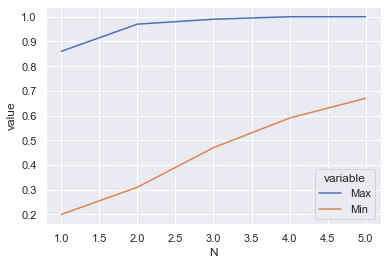

In [28]:
g = sns.lineplot(x='N', y='value', hue='variable', 
             data=pd.melt(df, ['N']),
             )
